# Model Training for Test-Time Scaling

This notebook focuses on training our baseline model using the preprocessed data. We'll cover:
1. Loading the preprocessed data
2. Configuring and initializing the model
3. Training the model
4. Initial performance evaluation
5. Feature importance analysis

## Setup and Data Loading

We'll start by importing required libraries and loading our preprocessed data from the previous notebook.

In [7]:
import sys
sys.path.append('..')

import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib

# Load preprocessed data
X_train = np.load('../data/processed/X_train.npy')
X_test = np.load('../data/processed/X_test.npy')
y_train = np.load('../data/processed/y_train.npy')
y_test = np.load('../data/processed/y_test.npy')

print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)

Training data shape: (800, 20)
Test data shape: (200, 20)


## Model Configuration

We'll use a Random Forest Classifier as our baseline model. This model is:
- Robust to feature scaling
- Good at handling both linear and non-linear relationships
- Provides feature importance scores
- Generally performs well on a variety of datasets

In [8]:
# Initialize the model with carefully chosen hyperparameters
model = RandomForestClassifier(
    n_estimators=100,  # Number of trees
    max_depth=None,    # Allow trees to grow fully
    random_state=42,   # For reproducibility
    n_jobs=-1         # Use all available cores
)

## Model Training

Now we'll train the model on our preprocessed training data. The model will learn the patterns in our scaled features to make predictions.

In [9]:
# Train the model and time the training process
import time
start_time = time.time()

model.fit(X_train, y_train)

training_time = time.time() - start_time
print(f"Training completed in {training_time:.2f} seconds")

# Save the trained model
joblib.dump(model, '../data/processed/baseline_model.pkl')

Training completed in 0.48 seconds


['../data/processed/baseline_model.pkl']

## Initial Model Evaluation

Let's evaluate our model's performance on both training and test sets to check for overfitting and establish baseline metrics.

In [10]:
# Evaluate on training set
y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Evaluate on test set
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training accuracy: {train_accuracy:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

print("\nDetailed Classification Report:")
print(classification_report(y_test, y_test_pred))

Training accuracy: 1.0000
Test accuracy: 0.8650

Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       100
           1       0.88      0.84      0.86       100

    accuracy                           0.86       200
   macro avg       0.87      0.86      0.86       200
weighted avg       0.87      0.86      0.86       200



## Feature Importance Analysis

Understanding which features are most important for our model's predictions will help us:
- Validate that the model is learning meaningful patterns
- Identify which features might be most affected by different scaling methods
- Guide our analysis of test-time scaling effects

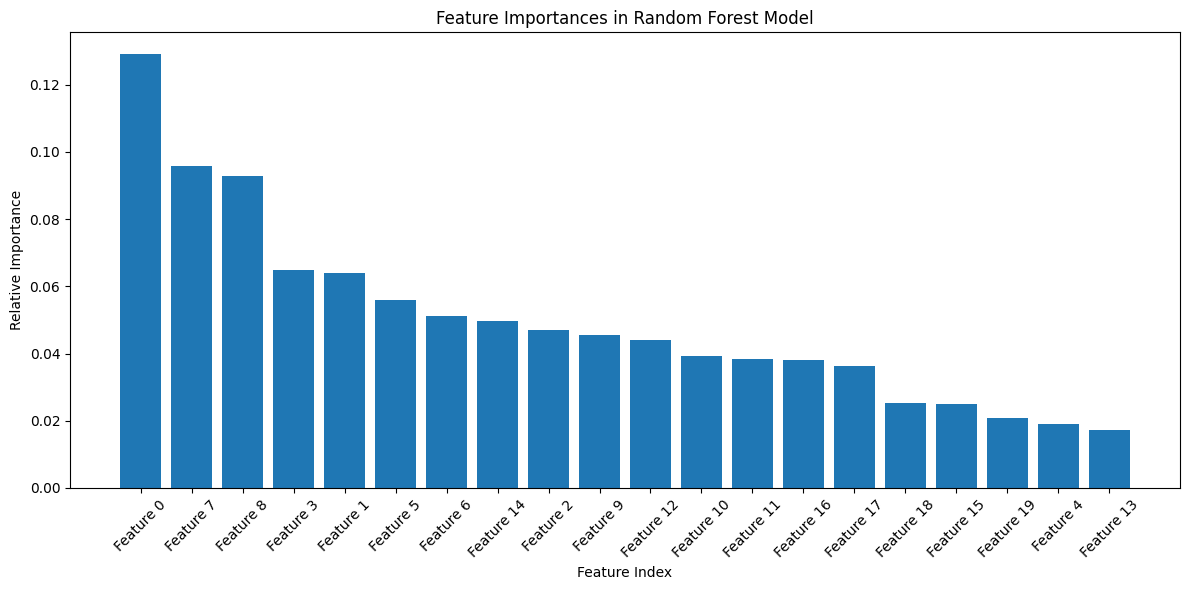


Top 5 Most Important Features:
Feature 0: 0.1291
Feature 7: 0.0958
Feature 8: 0.0928
Feature 3: 0.0649
Feature 1: 0.0641


In [11]:
import matplotlib.pyplot as plt

# Get feature importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.title("Feature Importances in Random Forest Model")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xlabel("Feature Index")
plt.ylabel("Relative Importance")
plt.xticks(range(X_train.shape[1]), [f'Feature {i}' for i in indices], rotation=45)
plt.tight_layout()
plt.show()

# Print top 5 most important features
print("\nTop 5 Most Important Features:")
for i in range(5):
    print(f"Feature {indices[i]}: {importances[indices[i]]:.4f}")